<a href="https://colab.research.google.com/github/IAMKK28-03-04/Kushal/blob/main/ASSIGNMENT_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/StudentsPerformance.csv')
print(data)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


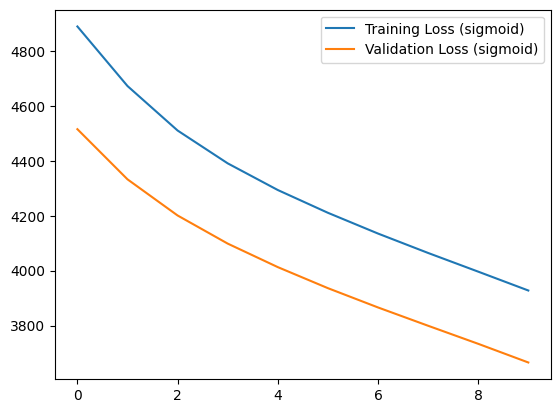

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3589.5232 - mean_absolute_error: 57.8117 
Activation: sigmoid, Loss: 3665.333, MAE: 58.527


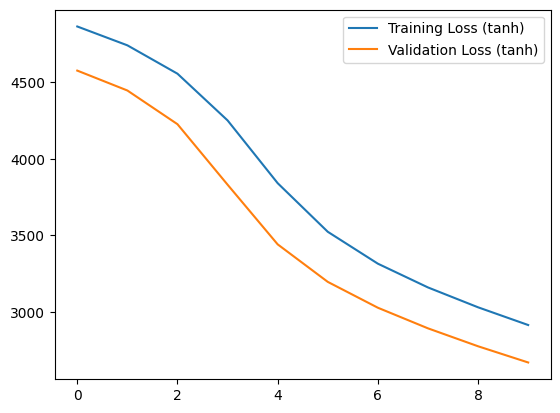

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2609.3801 - mean_absolute_error: 48.7136 
Activation: tanh, Loss: 2671.985, MAE: 49.404


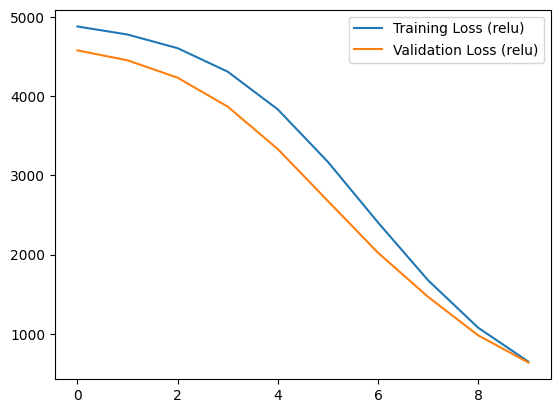

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 701.1444 - mean_absolute_error: 21.2436 
Activation: relu, Loss: 637.327, MAE: 20.533


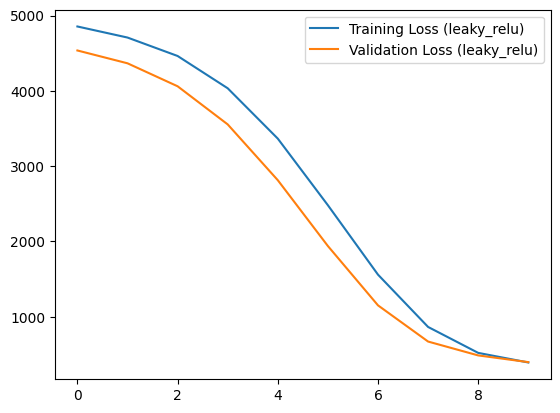

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 441.1670 - mean_absolute_error: 16.3824 
Activation: leaky_relu, Loss: 398.651, MAE: 15.866


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid, tanh, relu
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
import matplotlib.pyplot as plt

data = pd.read_csv('/content/StudentsPerformance.csv')

X = data[['math score', 'reading score']]
y = data['writing score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = (X - X.mean()) / X.std()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

activations = ['sigmoid', 'tanh', 'relu', 'leaky_relu']

for activation in activations:
    model = Sequential()
    model.add(Dense(64, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss=MeanSquaredError(),
                  metrics=[MeanAbsoluteError()])
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        verbose=0)
    plt.plot(history.history['loss'], label=f'Training Loss ({activation})')
    plt.plot(history.history['val_loss'], label=f'Validation Loss ({activation})')
    plt.legend()
    plt.show()
    loss, mae = model.evaluate(X_test, y_test)
    print(f"Activation: {activation}, Loss: {loss:.3f}, MAE: {mae:.3f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


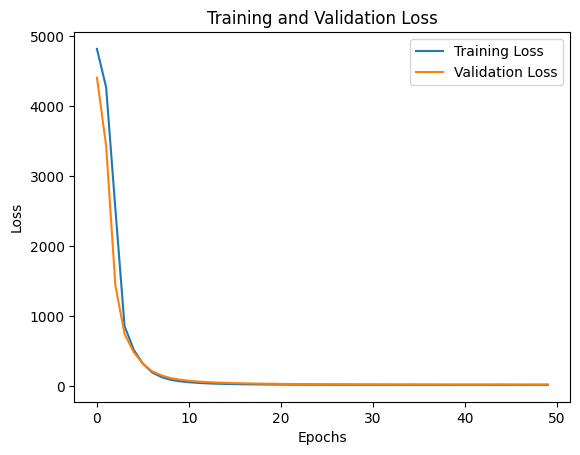

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.1752 - mean_absolute_error: 3.9755 
Loss: 25.445, MAE: 4.010


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid, tanh, relu
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
import matplotlib.pyplot as plt

data = pd.read_csv('/content/StudentsPerformance.csv')

X = data[['math score', 'reading score']]
y = data['writing score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=MeanSquaredError(),
              metrics=[MeanAbsoluteError()])

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=0)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss, mae = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.3f}, MAE: {mae:.3f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


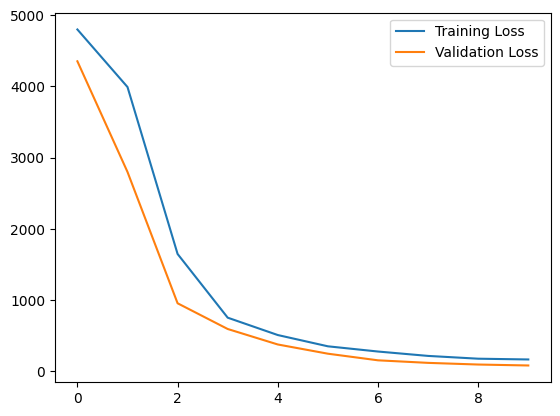

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 93.2390 - mean_absolute_error: 6.9444 


Loss: 80.668, MAE: 6.452
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.activations import relu, leaky_relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data = pd.read_csv('/content/StudentsPerformance.csv')

X = data[['math score', 'reading score']]
y = data['writing score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001),
loss=MeanSquaredError(),
metrics=[MeanAbsoluteError()])

early_stopping = EarlyStopping(patience=10, min_delta=0.001)
history = model.fit(X_train, y_train,
epochs=10,
batch_size=32,
validation_data=(X_test, y_test),
callbacks=[early_stopping],
verbose=0)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.3f}, MAE: {mae:.3f}")
predictions = model.predict(X_test)
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 116ms/step - accuracy: 0.8164 - loss: 0.6067 - val_accuracy: 0.9714 - val_loss: 0.0928
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 114ms/step - accuracy: 0.9600 - loss: 0.1342 - val_accuracy: 0.9807 - val_loss: 0.0558
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 129ms/step - accuracy: 0.9699 - loss: 0.1014 - val_accuracy: 0.9830 - val_loss: 0.0483
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9753 - loss: 0.0840 - val_accuracy: 0.9847 - val_loss: 0.0413
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 91s 111ms/step - accuracy: 0.9776 - loss: 0.0720 - val_accuracy: 0.9847 - val_loss: 0.0417
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9815 - loss: 0.0596 - val_accuracy: 0.9863 - val_loss: 0.0387
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 110ms/step - accuracy: 0.9825 - loss: 0.0551 - val_accuracy: 0.9882 - val_loss: 0.0356
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 93ms/step - accuracy: 0.9836 - loss: 0.05

Test loss: 0.0363013818860054
Test accuracy: 0.9873999953269958
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


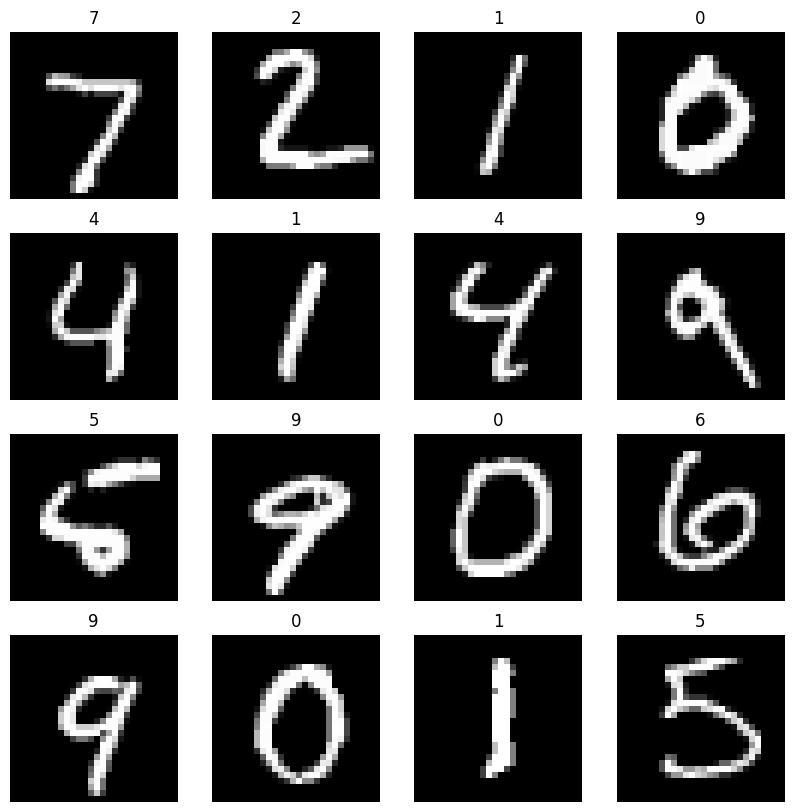

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(np.argmax(model.predict(x_test[i].reshape(1, 28, 28, 1))))
    plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001),

loss=MeanSquaredError(),
metrics=[MeanAbsoluteError()]
)
history = model.fit(X_train, y_train,
epochs=50,
batch_size=32,
validation_split=0.2
)
validation_data=(X_test, y_test),
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.3f}, MAE: {mae:.3f}")
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4903.0342 - mean_absolute_error: 68.2224 - val_loss: 4765.2183 - val_mean_absolute_error: 67.3963
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4726.2612 - mean_absolute_error: 67.2054 - val_loss: 4523.9497 - val_mean_absolute_error: 65.5657
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4609.3276 - mean_absolute_error: 66.0512 - val_loss: 4041.6550 - val_mean_absolute_error: 61.6817
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3802.5786 - mean_absolute_error: 59.6246 - val_loss: 3245.3438 - val_mean_absolute_error: 54.7875
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2941.9329 - mean_absolute_error: 51.8932 - val_loss: 2204.7864 - val_mean_absolute_error: 44.6371
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1846.5995 - mean_absolute_error: 39.7840 - val_loss: 1279.0280 - val_mean_absolute_error: 32.9303
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1072

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_85 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,117 (102.02 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,412 (68.02 KB)

None


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/10000 Sales Records.csv')
print(df)

                            Region                           Country  \
0               Sub-Saharan Africa                              Chad   
1                           Europe                            Latvia   
2     Middle East and North Africa                          Pakistan   
3               Sub-Saharan Africa  Democratic Republic of the Congo   
4                           Europe                    Czech Republic   
...                            ...                               ...   
9995                          Asia                              Laos   
9996                        Europe                     Liechtenstein   
9997            Sub-Saharan Africa  Democratic Republic of the Congo   
9998            Sub-Saharan Africa                      South Africa   
9999                          Asia                          Mongolia   

            Item Type Sales Channel Order Priority  Order Date   Order ID  \
0     Office Supplies        Online              L   1/27/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -2121641216.0000
Sigmoid Activation Function - Loss: -2108992384.000, Accuracy: 0.000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -2145798656.0000
Tanh Activation Function - Loss: -2133005568.000, Accuracy: 0.000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -100491747328.0000
ReLU Activation Function - Loss: -100805885952.000, Accuracy: 0.000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -101468413952.0000
LeakyReLU Activation Function - Loss: -101749358592.000, Accuracy: 0.000


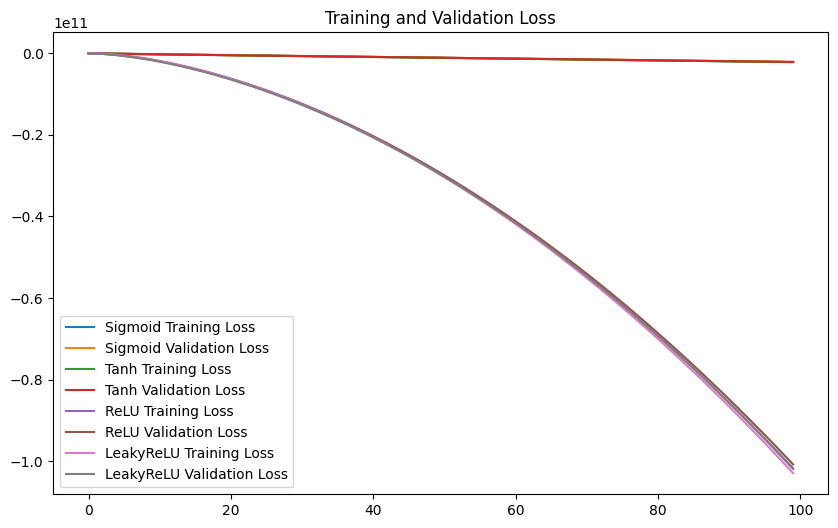

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid, tanh, relu, leaky_relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt

df = pd.read_csv('/content/10000 Sales Records.csv')

X = df[['Units Sold', 'Unit Price']]
y = df['Total Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def build_model(activation):
    model = Sequential()
    model.add(Dense(64, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(from_logits=False), metrics=[Accuracy()])
    return model

activations = [sigmoid, tanh, relu, leaky_relu]
activation_names = ['Sigmoid', 'Tanh', 'ReLU', 'LeakyReLU']
models = [build_model(activation) for activation in activations]
histories = []
for model, activation_name in zip(models, activation_names):
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    histories.append(history)
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"{activation_name} Activation Function - Loss: {loss:.3f}, Accuracy: {accuracy:.3f}")

plt.figure(figsize=(10, 6))
for i, (history, activation_name) in enumerate(zip(histories, activation_names)):
    plt.plot(history.history['loss'], label=f"{activation_name} Training Loss")
    plt.plot(history.history['val_loss'], label=f"{activation_name} Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -1721985094522314424320.0000
Loss: -1727352963065674989568.000, Accuracy: 0.000


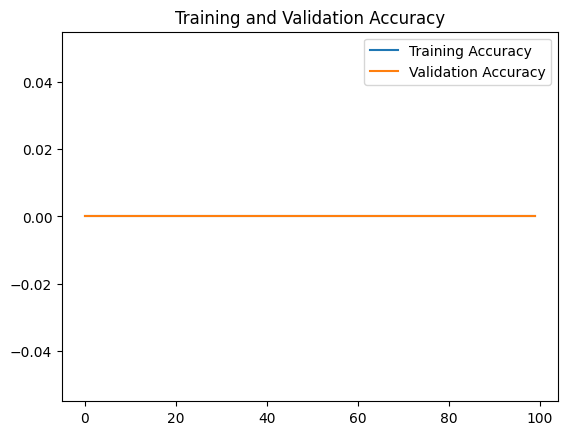

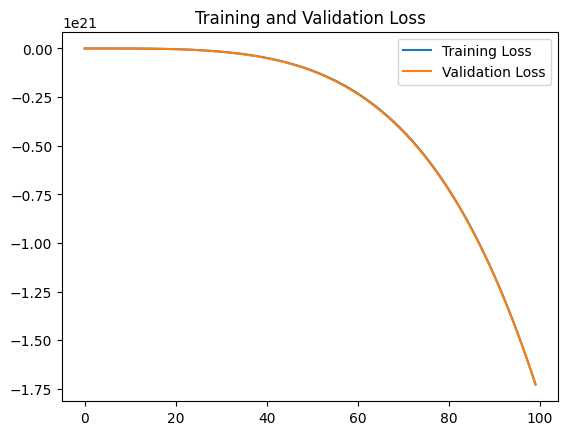

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(256, activation=relu, input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation=relu))
model.add(Dense(64, activation=relu))
model.add(Dense(32, activation=relu))
model.add(Dense(1, activation=sigmoid))
model.compile(optimizer=Adam(learning_rate=0.001),

loss=BinaryCrossentropy(from_logits=False),
metrics=[Accuracy()])
history = model.fit(X_train, y_train,
epochs=100,
batch_size=32,
validation_data=(X_test, y_test),
verbose=0)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.3f}, Accuracy: {accuracy:.3f}")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


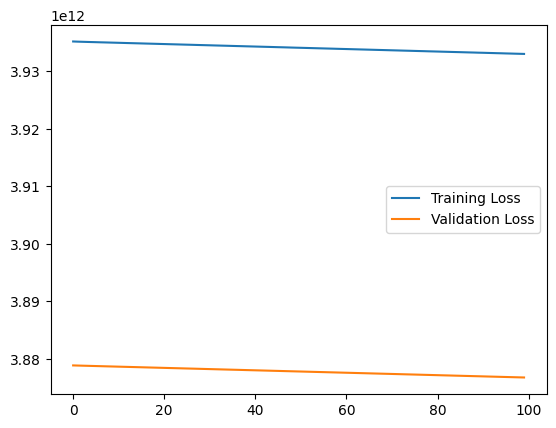

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3838199463936.0000 - mean_absolute_error: 1311855.2500
Loss: 3876735418368.00, MAE: 1304028.88


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='tanh'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), verbose=0)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss:.2f}, MAE: {mae:.2f}')

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 100ms/step - accuracy: 0.8215 - loss: 0.5871 - val_accuracy: 0.9725 - val_loss: 0.0918
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 84ms/step - accuracy: 0.9586 - loss: 0.1373 - val_accuracy: 0.9794 - val_loss: 0.0642
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - accuracy: 0.9713 - loss: 0.0959 - val_accuracy: 0.9826 - val_loss: 0.0497
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.9737 - loss: 0.0844 - val_accuracy: 0.9819 - val_loss: 0.0483
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 0.9785 - loss: 0.0700 - val_accuracy: 0.9853 - val_loss: 0.0412
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 86ms/step - accuracy: 0.9781 - loss: 0.0692 - val_accuracy: 0.9858 - val_loss: 0.0401
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 81ms/step - accuracy: 0.9815 - loss: 0.0580 - val_accuracy: 0.9857 - val_loss: 0.0422
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9833 - loss: 0.0524 -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


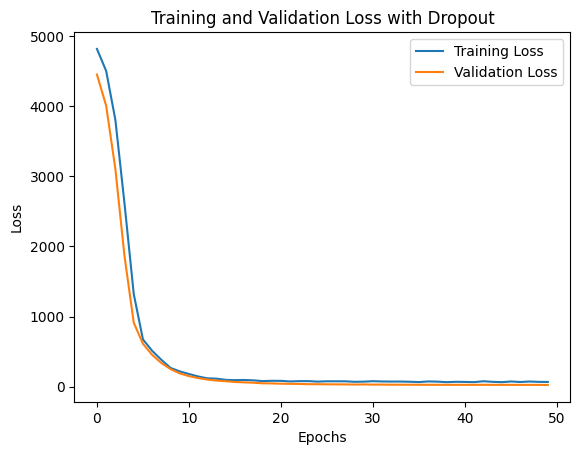

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.5828 - mean_absolute_error: 4.0822 
Loss: 26.213, MAE: 3.975


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
import matplotlib.pyplot as plt

df = pd.read_csv('/content/StudentsPerformance.csv')

X = df[['math score', 'reading score']]
y = df['writing score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=MeanSquaredError(),
              metrics=[MeanAbsoluteError()])

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=0)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss, mae = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.3f}, MAE: {mae:.3f}")
